In [2]:
import joblib
df = joblib.load("../learning_notebooks/01_Advanced_Pandas_and_Real_EDA.ipynb")

In [3]:
df.head()

,Gender,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,TotalIncome,LoanIncomeRatio,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,IncomeGroup_medium,IncomeGroup_high,IncomeGroup_veryhigh
0,1,5849,0,146,360,1,5849,0,0,0,0,0,0,0,1,0,0,1
1,1,4583,1508,128,360,1,6091,0,1,1,0,0,0,0,0,0,0,1
2,1,3000,0,66,360,1,3000,0,1,0,0,0,0,1,1,1,0,0
3,1,2583,2358,120,360,1,4941,0,1,0,0,0,1,0,1,0,1,0
4,1,6000,0,141,360,1,6000,0,0,0,0,0,0,0,1,0,0,1


In [4]:
# handel outlier

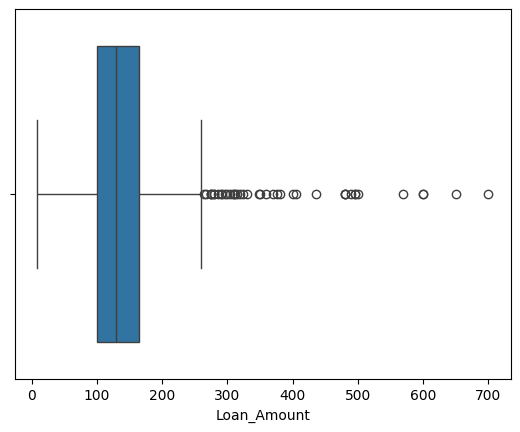

In [5]:
# visaulizee the outliers
# boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Loan_Amount'])
plt.show()

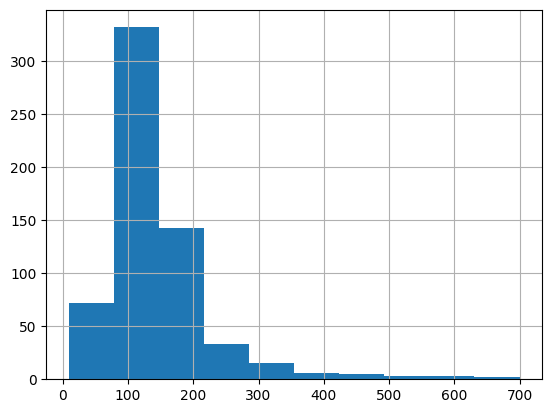

In [6]:
# heatmap
df['Loan_Amount'].hist() 
plt.show()

In [7]:
# statistical detection  
# iqr method 
q1=df['Loan_Amount'].quantile(0.25)
q3=df['Loan_Amount'].quantile(0.75)
iqr=q3-q1 
lower=q1-iqr*1.5
upper=q3+iqr*1.5

In [8]:
# df=df[(df['Loan_Amount']>=lower)&(df['Loan_Amount']<=upper)] # it is 

In [9]:
# capping 
# clip method 
df['Loan_Amount']=df['Loan_Amount'].clip(lower,upper)

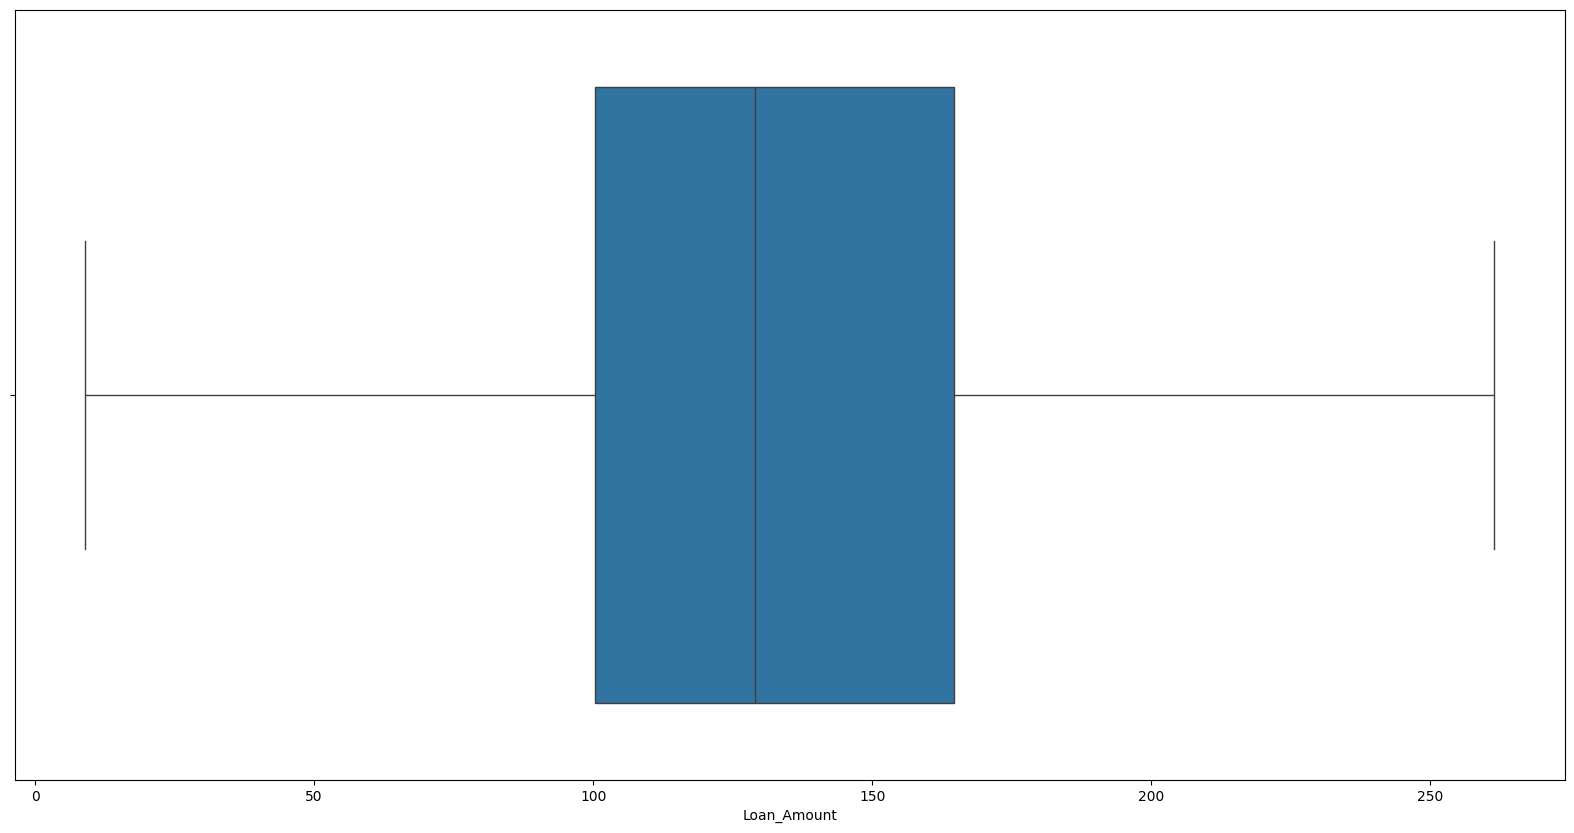

In [10]:
# after removing outlier view
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Loan_Amount'])
plt.show()

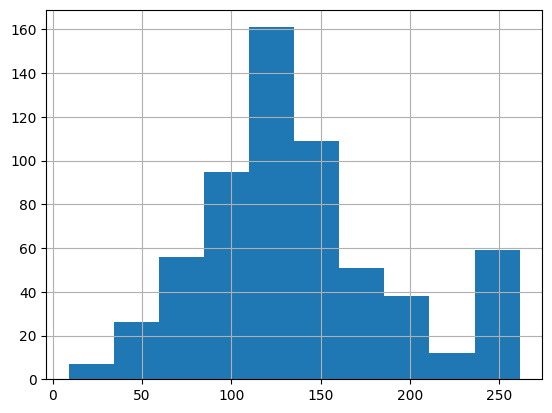

In [11]:
# after removing outlier view using histogram
df['Loan_Amount'].hist()
plt.show()

In [12]:
# now feature scaling

In [13]:
# split data into input X and output y
X=df.drop('Loan_Status_Y',axis=1)
y=df['Loan_Status_Y']

In [14]:
# split train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# apply standard scaler 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
# verify mean 
X_train_scaled.mean()

np.float64(8.725366049528006e-18)

In [17]:
# feature selection

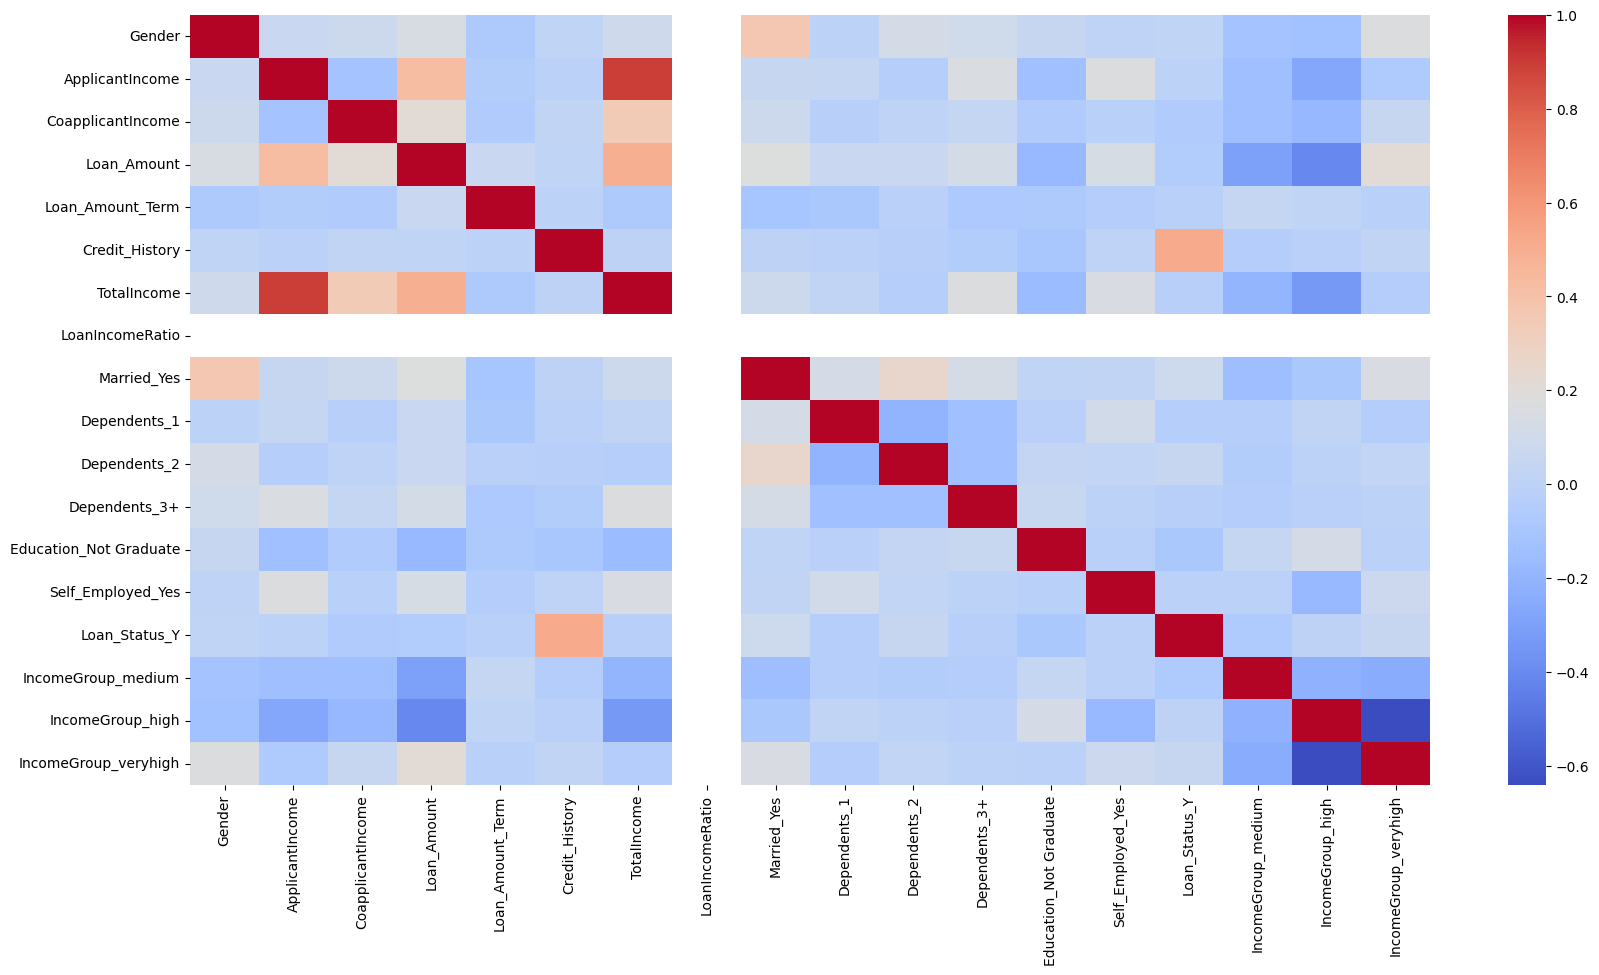

In [18]:
# Plot correlation heatmap
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [19]:
# use rfe to find top feature 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr_model=LogisticRegression() 
rfe=RFE(lr_model,n_features_to_select=5)
rfe.fit(X_train,y_train)

C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

,estimator,LogisticRegression()
,n_features_to_select,5
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [20]:
rfe.support_

array([ True, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False, False])

In [21]:
rfe.ranking_

array([ 1, 11, 10,  8,  9,  1, 12, 13,  1,  1,  5,  6,  4,  7,  1,  3,  2])

In [22]:
# 1 redundant feature - Credit_History 
# top features - LoanIncomeRatio

In [23]:
# advanced visualization 
# feature vs target

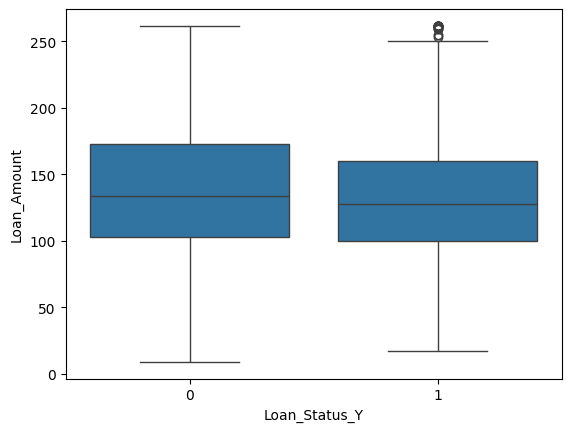

In [25]:
sns.boxplot(x=df['Loan_Status_Y'],y=df['Loan_Amount'])
plt.show()

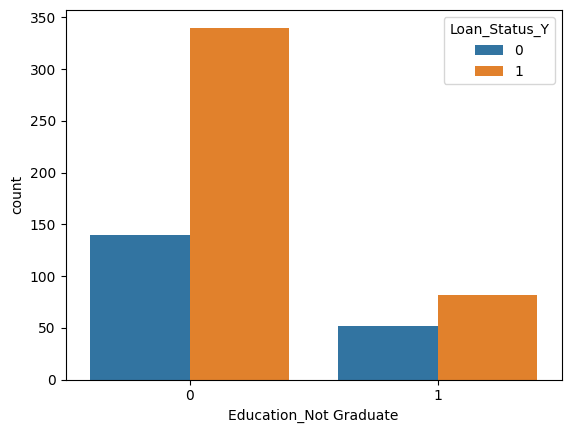

In [28]:
# catagory vs target
sns.countplot(x='Education_Not Graduate',hue='Loan_Status_Y',data=df)
plt.show()

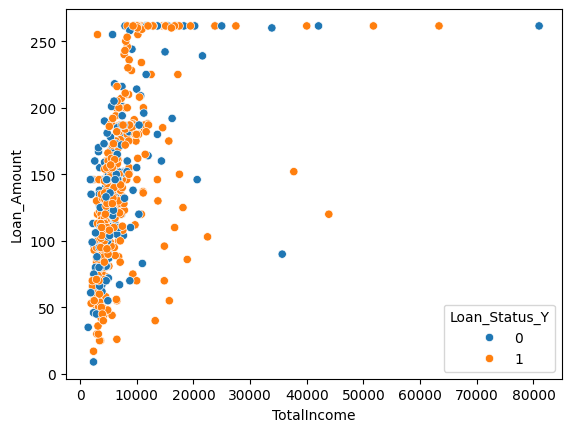

In [29]:
sns.scatterplot(x='TotalIncome',y='Loan_Amount',hue='Loan_Status_Y',data=df)
plt.show()

In [30]:
# Higher total income increases loan approval probability

In [31]:
# Extremely high loan amounts reduce approval chance

In [32]:
# Education shows moderate influence